# Exercise 02 - Introduction to Scikit-Learn

After completing this notebook, you should be able to:
* train a classifier on a given dataset using scikit-learn
* navigate the scikit-learn documentation
* evaluate a model using scikit-learn

Ressources used: 
* https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
* https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
* https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
* https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

## Training a Simple Classifier

We will use the 'digits' dataset consisting of 8x8 images of handwritten digits.

Target names: [0 1 2 3 4 5 6 7 8 9]


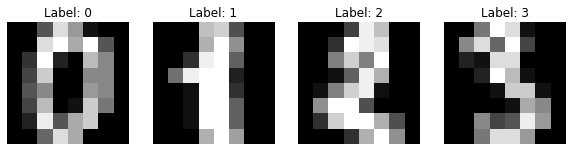

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# TODO: load the digits dataset (look at the documentation to see how to do it)
db = datasets.load_digits()

# TODO: print out the different classes
print("Target names:", db.target_names)
#print(db.data.shape)
# TODO: visually inspect the first 4 instances (use the matplotlib library) and their labels
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i in range(4):
    axes[i].imshow(db.images[i], cmap='gray')
    axes[i].set_title(f"Label: {db.target[i]}")
    axes[i].axis('off')
plt.show()

Our goal is now to train a logistic regression model to predict the class of an instance of the iris dataset.
Before we train the model, we have to split the data, since the evaluation would otherwise be not representative of future performance.

In [64]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# TODO: look in the documentation how to split the data into training and test data. 
# Then split the data. Use 20% for testing. Make sure that the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1437, 64) (360, 64) (1437,) (360,)


In [65]:
# TODO: use the StandardScaler to scale the inputs.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Q: Which inputs should it use?
#X_train and X_test because they are contain the feature data for training and test.
print(X_train, X_test)


[[ 0.         -0.34169755 -0.46336049 ...  1.05270303  0.45952251
  -0.19710003]
 [ 0.         -0.34169755  0.78471641 ... -0.64451929 -0.50623083
  -0.19710003]
 [ 0.         -0.34169755 -1.08739895 ... -0.13535259 -0.50623083
  -0.19710003]
 ...
 [ 0.         -0.34169755  0.78471641 ...  1.56186972 -0.02335416
  -0.19710003]
 [ 0.         -0.34169755 -0.87938613 ... -1.15368598 -0.50623083
  -0.19710003]
 [ 0.         -0.34169755 -0.87938613 ... -0.98396375 -0.50623083
  -0.19710003]] [[ 0.         -0.34169755 -1.08739895 ...  1.22242526  0.70096084
  -0.19710003]
 [ 0.         -0.34169755  1.20074205 ... -0.98396375 -0.50623083
  -0.19710003]
 [ 0.         -0.34169755  0.57670359 ...  0.20409187 -0.50623083
  -0.19710003]
 ...
 [ 0.         -0.34169755  0.36869078 ...  0.54353633 -0.50623083
  -0.19710003]
 [ 0.         -0.34169755  0.36869078 ...  1.56186972  0.45952251
  -0.19710003]
 [ 0.         -0.34169755  1.8247805  ... -0.30507483 -0.50623083
  -0.19710003]]


In [66]:
# TODO: define a logistic regression model and train it using the training data. 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [77]:
# Afterwards, print the accuracy of the model on the held-out data.
y_pred_log = log_reg.predict(X_test)
acc = log_reg.score(X_test, y_test)
print("Accuracy:", acc)

# Again, keep reproducibility in mind.

Accuracy: 0.9722222222222222


If everything went well, the accuracy should be >95%. 
Use the `classification_report` and the `ConfusionMatrixDisplay` from sklearn.metrics to get more insights into the performance.

Does anything catch your eye?

In [68]:
from sklearn import metrics

# TODO: print a detailed model evaluation

In [78]:
#Classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

report = classification_report(y_test, y_pred_log)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



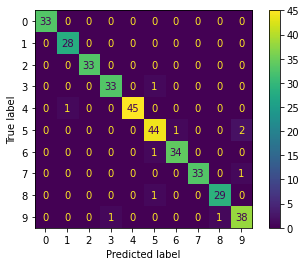

In [79]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(db.target))
disp.plot()
plt.show()

## Switching the Model

Now, use an SVM to classify the digits.
Since all models share the same interface, this extremely easy in sklearn. 

Accuracy: 0.975
Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



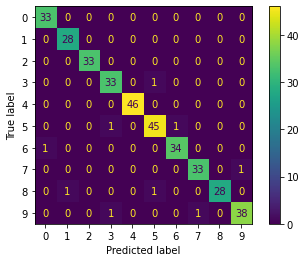

In [80]:
# TODO: instantiate and train an SVM (with linear kernel) on the previous task
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

acc_svm = svm.score(X_test, y_test)

print("Accuracy:", acc_svm)

report_svm = classification_report(y_test, y_pred_svm)
print("Classification report:\n", report_svm)

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(db.target))
disp.plot()

plt.show()

In [84]:
# How does the performance compare to the logistic regression model?
#Slightly the SVM acc is better than the Log_Reg(0.002) and also in some cases in recal and F1 score SVM is better. Because of the clear 
#decision boundaries between the classes

from sklearn.metrics import accuracy_score
log_reg_acc = accuracy_score(y_test, y_pred_log)
svm_acc = accuracy_score(y_test, y_pred_svm)

print("Logistic Regression Accuracy: {:.4f}".format(log_reg_acc))
print("SVM Accuracy: {:.4f}".format(svm_acc))

diff = log_reg_acc - svm_acc
diff


Logistic Regression Accuracy: 0.9722
SVM Accuracy: 0.9750


-0.002777777777777768

## Cross-Validation

So far, we have always used the same train-test split.
But what if this split is easier for the SVM just by random chance.
Now, we use cross validation to get a better idea about the performance.

In [ ]:
#SVM Cross validation

In [89]:

from sklearn.model_selection import KFold

# What do we have to do with respect to feature normalization?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(db.data)

svm = SVC(kernel='linear', random_state=42)

# TODO: from sklearn.model_selection, use KFold to implement 3-fold cross validation.
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Estimate the performance of the svm using cross-validation.
scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]

    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    scores.append(score)

print("SVM cross validation: {:.4f} (+/- {:.4f})".format(np.mean(scores), np.std(scores) * 2))


SVM cross validation: 0.9744 (+/- 0.0042)


## Pipelines and Model Selection

In the previous implementation of k-fold crossvalidation, you had to fit the scaler in the loop for every fold to avoid data leakage.
If we had more preprocessing steps, this would significantly bloat our code. 
And writing the loop ourselves is not very nice in the first place.

Sklearn offers a way to abstract pre- (and post) processing steps into a pipeline.
Then it is possible with some helper functions to abstract most of the code we wrote away.

Here, we will use it to easily do a hyperparameter search.

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# TODO: write a pipeline with two steps: "scaling", and "model" (use a SVM again)
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('model', SVC(kernel='linear', random_state=42))
])

# TODO: Conduct a randomized search for optimal hyperparameters of the model.
    # 1) Define the search space for kernel and regularization C
hyperparameters = {
    'model__C': uniform(loc=0, scale=4),
    'model__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(10))
}
    # 2) Run the search and retrieve the best parameters using the pipeline of the previous step
random_search = RandomizedSearchCV(
    pipeline,
    hyperparameters,
    n_iter=20,
    cv=3,
    random_state=42
)


random_search.fit(X_train, y_train)
print("Top hyperparameters:", random_search.best_params_)
print("Top CV score:", random_search.best_score_)






Top hyperparameters: {'model__C': 0.053059844639466114, 'model__gamma': 0.5200393453092432}
Top CV score: 0.9424122807017543


## Closing Question

What is a problem with our evaluation setup with respect to the data? 
Can we trust our CV results to hold on new data?

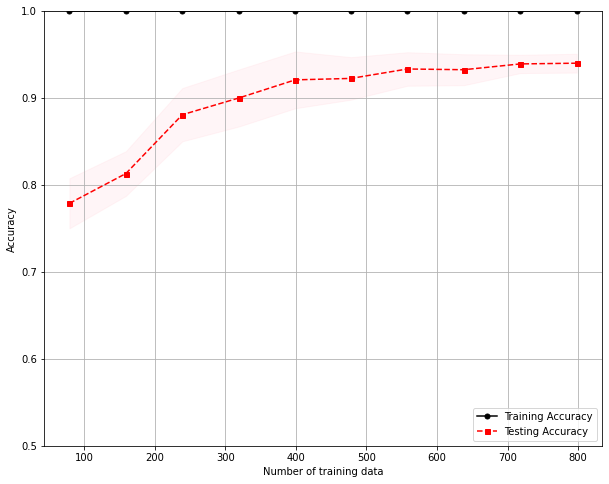

In [107]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1)
)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=3,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='black', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='black')
plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='pink')
plt.grid()
plt.xlabel('Number of training data')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

# As you can see the training accuracy is really higher than test accuracy and it means we have a overfitting here.